# Data Modelling

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from yellowbrick.datasets import load_spam

%matplotlib inline

In [101]:
# Importing the data

In [2]:
data = pd.read_csv('clean_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,29.84,29.84,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,0,0,1,56.94,1890.00,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,0,...,0,0,1,0,0,0,1,53.84,108.10,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,1,0,0,0,42.30,1841.00,0
4,9237-HQITU,0,0,0,0,2,1,0,0,1,...,0,0,1,0,0,1,0,70.70,151.60,1


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'IntrntSrvc_DSL',
       'IntrntSrvc_FiberOptic', 'IntrntSrvc_No', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Monthly', 'Contract_OneYear',
       'Contract_TwoYear', 'PaperlessBilling', 'PayMthd_BankTransfer',
       'PayMthd_CreditCard', 'PayMthd_ElectronicCheck', 'PayMthd_MailedCheck',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
len(data.columns)

28

# Data Preprocessing

In [5]:
# Customer ID is not relevant for deciding whether or not if a customer is going to churn or not
# so we drop it
data.drop('customerID', axis = 1 , inplace = True)

In [6]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,IntrntSrvc_No,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,29.84,29.84,0
1,1,0,0,0,34,1,0,1,0,0,...,1,0,0,0,0,0,1,56.94,1890.00,0
2,1,0,0,0,2,1,0,1,0,0,...,0,0,1,0,0,0,1,53.84,108.10,1
3,1,0,0,0,45,0,0,1,0,0,...,1,0,0,1,0,0,0,42.30,1841.00,0
4,0,0,0,0,2,1,0,0,1,0,...,0,0,1,0,0,1,0,70.70,151.60,1


In [7]:
# Inorder for feature selection, we need convert data from bool to numerical (int)
# We identify such columns below
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7015 non-null   int64  
 1   SeniorCitizen            7015 non-null   int64  
 2   Partner                  7015 non-null   int64  
 3   Dependents               7015 non-null   int64  
 4   tenure                   7015 non-null   int64  
 5   PhoneService             7015 non-null   int64  
 6   MultipleLines            7015 non-null   int64  
 7   IntrntSrvc_DSL           7015 non-null   int64  
 8   IntrntSrvc_FiberOptic    7015 non-null   int64  
 9   IntrntSrvc_No            7015 non-null   int64  
 10  OnlineSecurity           7015 non-null   int64  
 11  OnlineBackup             7015 non-null   int64  
 12  DeviceProtection         7015 non-null   int64  
 13  TechSupport              7015 non-null   int64  
 14  StreamingTV             

In [8]:
bool2int = ['IntrntSrvc_DSL','IntrntSrvc_FiberOptic','IntrntSrvc_No','Contract_Monthly','Contract_OneYear','Contract_TwoYear','PayMthd_BankTransfer','PayMthd_CreditCard','PayMthd_ElectronicCheck','PayMthd_MailedCheck']

In [9]:
from numpy import int64


data[bool2int] = data[bool2int].astype(int64)

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,IntrntSrvc_No,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,29.84,29.84,0
1,1,0,0,0,34,1,0,1,0,0,...,1,0,0,0,0,0,1,56.94,1890.00,0
2,1,0,0,0,2,1,0,1,0,0,...,0,0,1,0,0,0,1,53.84,108.10,1
3,1,0,0,0,45,0,0,1,0,0,...,1,0,0,1,0,0,0,42.30,1841.00,0
4,0,0,0,0,2,1,0,0,1,0,...,0,0,1,0,0,1,0,70.70,151.60,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7015 non-null   int64  
 1   SeniorCitizen            7015 non-null   int64  
 2   Partner                  7015 non-null   int64  
 3   Dependents               7015 non-null   int64  
 4   tenure                   7015 non-null   int64  
 5   PhoneService             7015 non-null   int64  
 6   MultipleLines            7015 non-null   int64  
 7   IntrntSrvc_DSL           7015 non-null   int64  
 8   IntrntSrvc_FiberOptic    7015 non-null   int64  
 9   IntrntSrvc_No            7015 non-null   int64  
 10  OnlineSecurity           7015 non-null   int64  
 11  OnlineBackup             7015 non-null   int64  
 12  DeviceProtection         7015 non-null   int64  
 13  TechSupport              7015 non-null   int64  
 14  StreamingTV             

# Feature Scaling

In [12]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data['tenure'] = mms.fit_transform(data[['tenure']])
data['MonthlyCharges'] = mms.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = mms.fit_transform(data[['TotalCharges']])

# Train Test Split

In [14]:
X = data.drop('Churn', axis = 1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [78]:
def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    evaluate(model, X_train, X_test, y_train, y_test, y_pred)

def evaluate(model, X_train, X_test, y_train, y_test, y_pred):    
    # confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)    
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = [0, 1]  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
    plt.show()

    #Classification report
    clf_rpt = classification_report(y_test,y_pred) 
    print(clf_rpt)    
    
    # ROC-AUC visualization
    visualizer = ROCAUC(model, classes=[0, 1], binary=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    #Precision Recoil Curve
    visualizer = PrecisionRecallCurve(model, binary=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    plt.show()

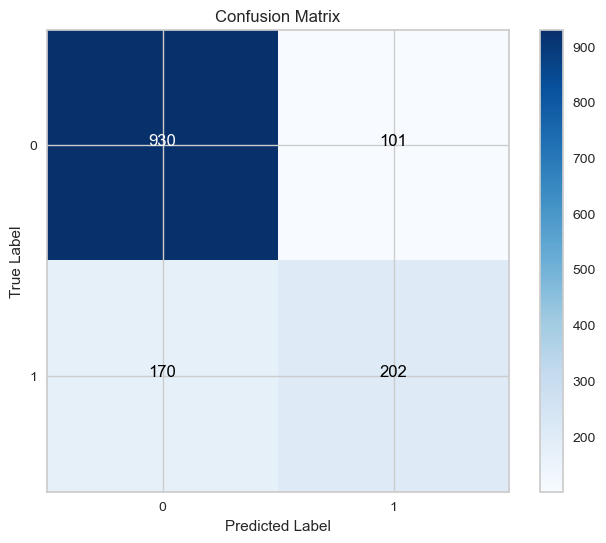

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1031
           1       0.67      0.54      0.60       372

    accuracy                           0.81      1403
   macro avg       0.76      0.72      0.74      1403
weighted avg       0.80      0.81      0.80      1403



C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


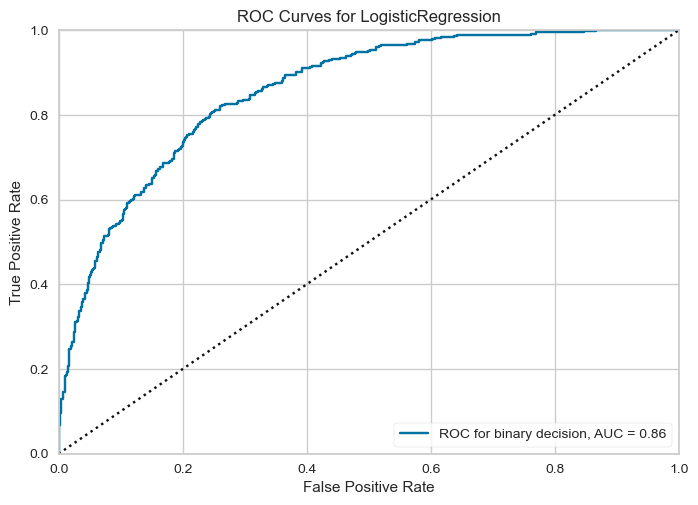

C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


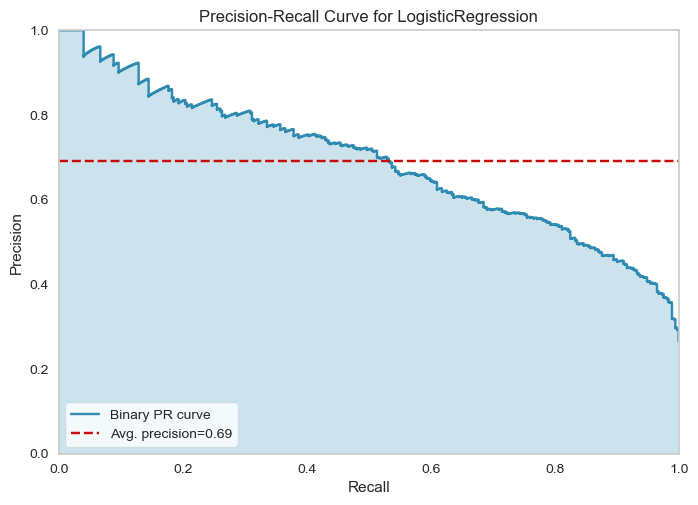

In [79]:
## Baseline Model Logistic Regression
from sklearn.linear_model import LogisticRegression
train_model(LogisticRegression(),X_train,y_train,X_test,y_test)

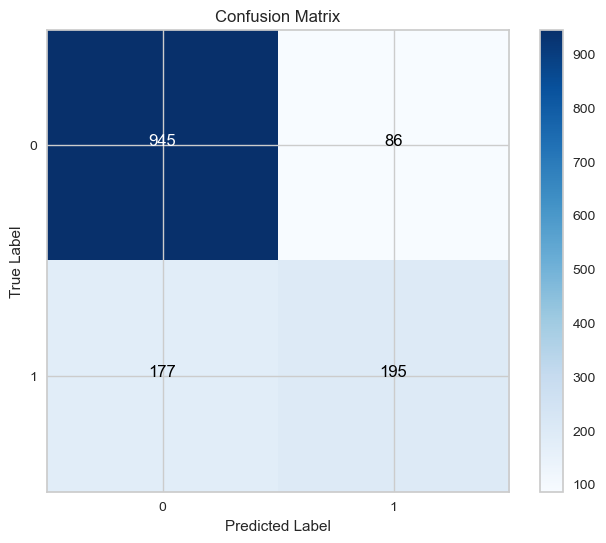

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1031
           1       0.69      0.52      0.60       372

    accuracy                           0.81      1403
   macro avg       0.77      0.72      0.74      1403
weighted avg       0.80      0.81      0.80      1403



C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


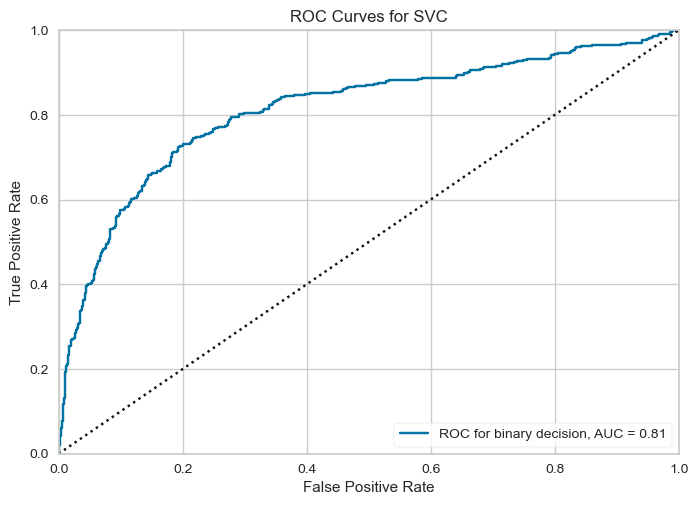

C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


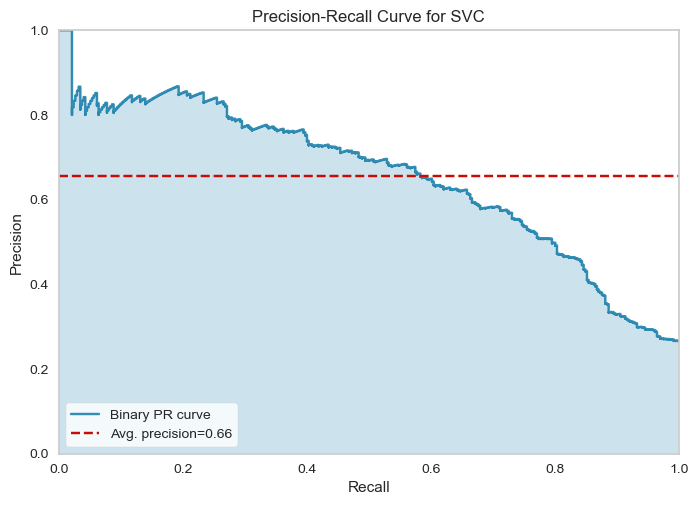

In [80]:
## Support Vector Classifier
from sklearn.svm import SVC
train_model(SVC(),X_train,y_train,X_test,y_test)

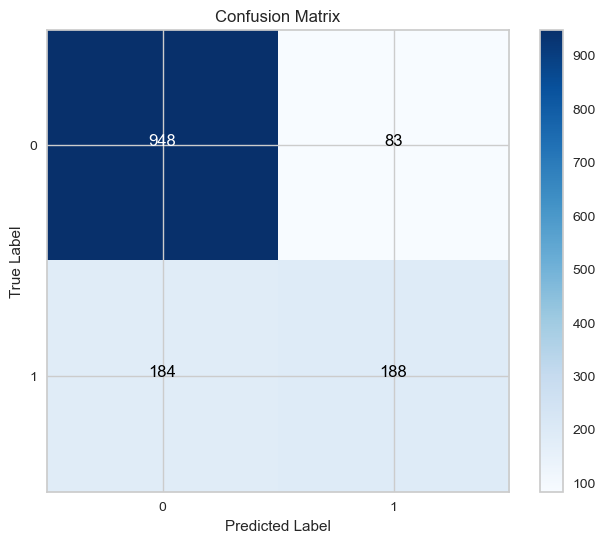

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1031
           1       0.69      0.51      0.58       372

    accuracy                           0.81      1403
   macro avg       0.77      0.71      0.73      1403
weighted avg       0.80      0.81      0.80      1403



C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


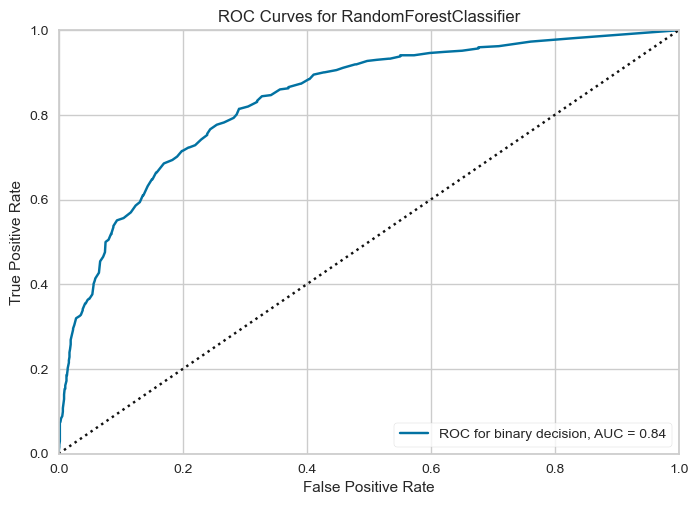

C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


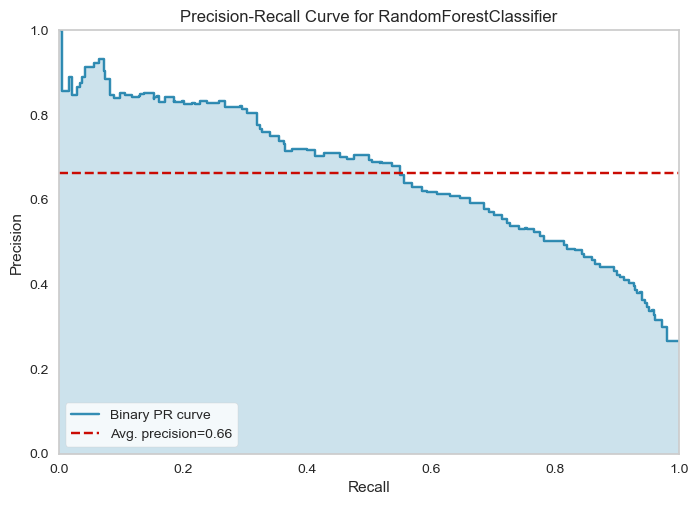

In [81]:
from sklearn.ensemble import RandomForestClassifier
train_model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

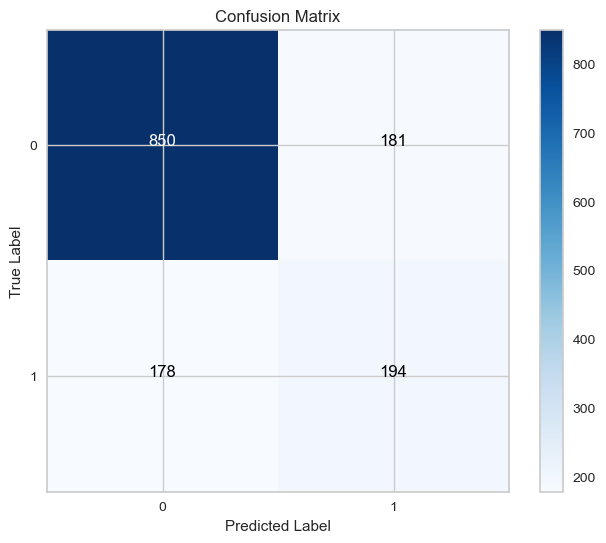

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1031
           1       0.52      0.52      0.52       372

    accuracy                           0.74      1403
   macro avg       0.67      0.67      0.67      1403
weighted avg       0.74      0.74      0.74      1403



C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


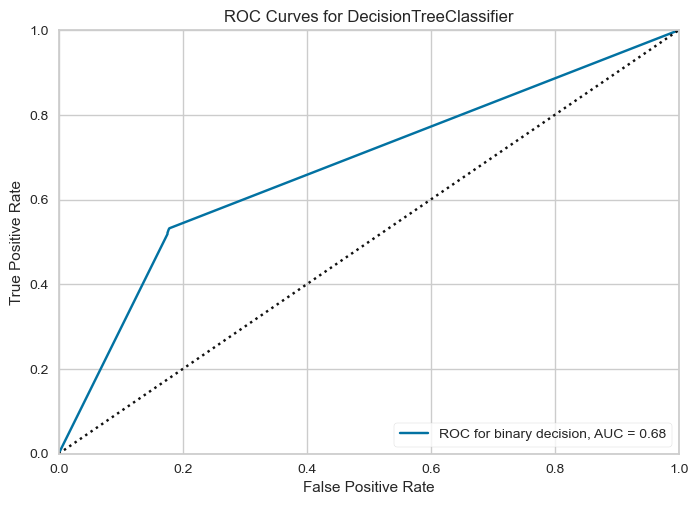

C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


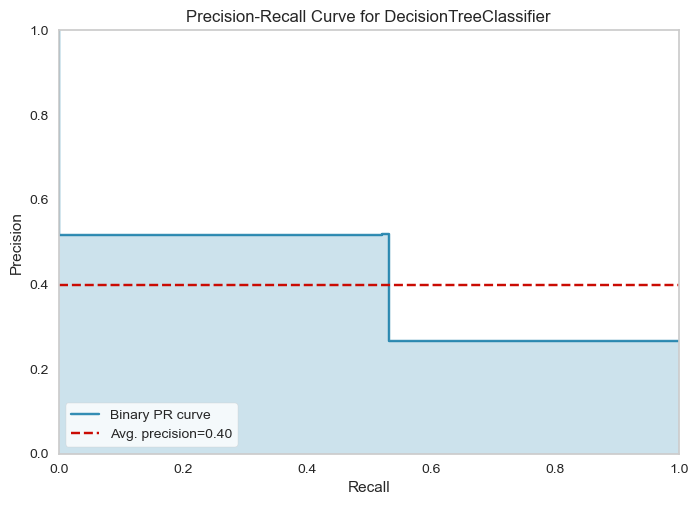

In [82]:
from sklearn.tree import DecisionTreeClassifier
train_model(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)

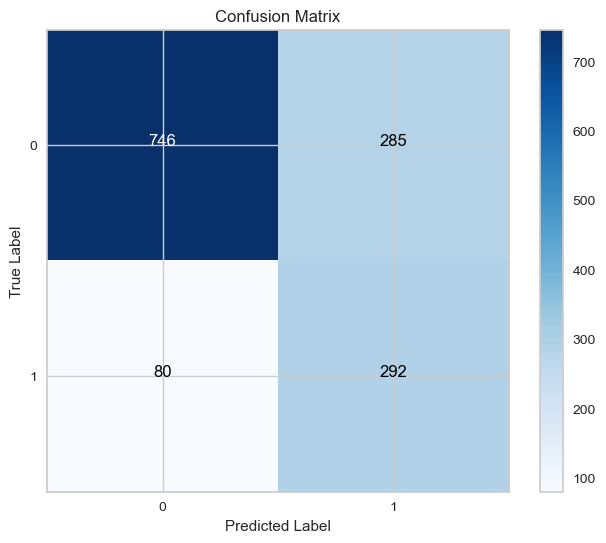

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1031
           1       0.51      0.78      0.62       372

    accuracy                           0.74      1403
   macro avg       0.70      0.75      0.71      1403
weighted avg       0.80      0.74      0.75      1403



C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


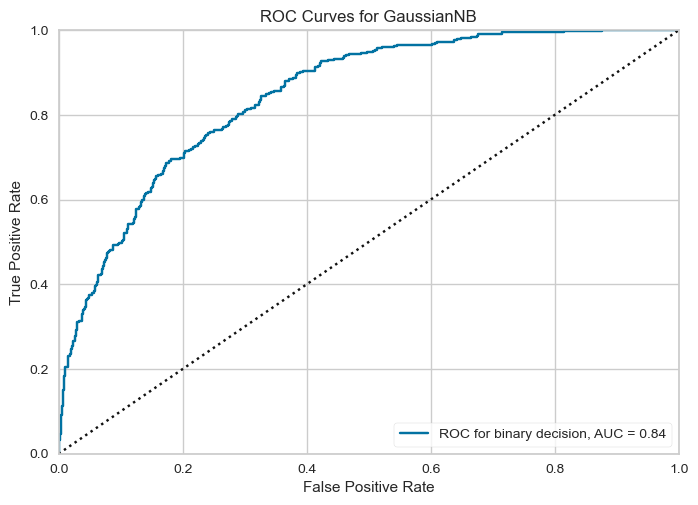

C:\Users\patel\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


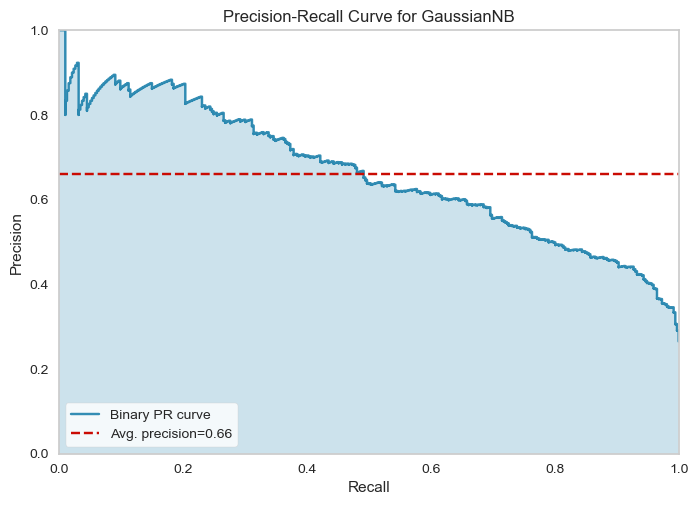

In [83]:
from sklearn.naive_bayes import GaussianNB
train_model(GaussianNB(),X_train,y_train,X_test,y_test)

In [84]:
## Neural Network Model
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [57]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

NameError: name 'Sequential' is not defined

In [28]:
history_dict = history.history


loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

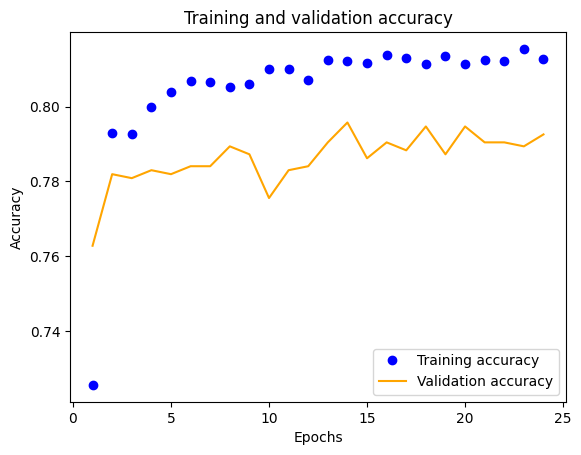

0.7957446575164795

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

np.max(val_acc)

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

np.round(model.predict(X_test),0)

preds = np.round(model.predict(X_test),0)


print(confusion_matrix(y_test, preds)) 
print(classification_report(y_test, preds))

73/73 [==============================] - 0s 2ms/step
[[1602   92]
 [ 376  245]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1694
           1       0.73      0.39      0.51       621

    accuracy                           0.80      2315
   macro avg       0.77      0.67      0.69      2315
weighted avg       0.79      0.80      0.78      2315

